In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%run Preprocessing.py

In [3]:
df = pd.read_csv("austin_weather.csv")

In [4]:
X_train, X_test, y_train, y_test, X_val, y_val = preprocess(df)

In [5]:
# We will train for Rain first
y_train_thunderstorm = y_train["Thunderstorm"]
y_val_thunderstorm = y_val["Thunderstorm"]

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [7]:
params_svm = {
'C': [0.001, 0.01, 0.1, 1, 10, 100],    
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'degree' : [2,3,4,5,6,7,8,9,10],
'gamma': ['scale', 'auto'], 
'random_state' : [101] }

clf = GridSearchCV(SVC(), params_svm, cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train_thunderstorm)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [101]},
             verbose=1)

In [8]:
print(classification_report(y_val_thunderstorm, clf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       165
           1       0.74      0.42      0.54        33

    accuracy                           0.88       198
   macro avg       0.82      0.70      0.73       198
weighted avg       0.87      0.88      0.86       198



<AxesSubplot: >

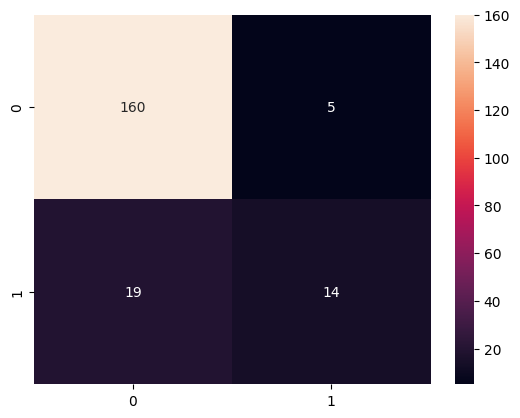

In [9]:
cm = confusion_matrix(y_val_thunderstorm, clf.predict(X_val))
sns.heatmap(cm, annot=True, fmt="d")